In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from sklearn.utils import shuffle


from sklearn.preprocessing import MinMaxScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [47]:
from os import chdir
from glob import glob
import pandas as pd
import glob
import os

os.environ["CUDA_VISIBLE_DEVICES"]="0"


def mergeCSV(file_list):
    df_merge=pd.DataFrame()
    for file in file_list:
        df=pd.read_csv(file, header=None)
        df_merge=pd.concat([df, df_merge], ignore_index=True, sort=False)
    print(df_merge.shape)
    
    return df_merge


file_list=[]
for filepath in glob.iglob(r'C:/Users/antonebert/Desktop/WS2021 Programing/MADI/Activity Recognition from Single Chest-Mounted Accelerometer/*.csv'):
    file_list.append(filepath)

df_merged_csv=mergeCSV(file_list)

(1926896, 5)


In [48]:
df=df_merged_csv.drop(columns=[0])
df.columns=['x','y','z','label']

df=df[df["label"] != 0] #data cleaning: Leaving out unlabeled data || (3719, 4)
#df_null.head()
print(df.shape)
#cl=[1,3,4]
df=df[(df["label"] == 1) | (df["label"] == 3) | (df["label"] == 4)]
#df[df['label'].isin(cl)]
df.shape

(1923177, 4)


(1182468, 4)

## Data are separated by participant
Each file contains the following information
sequential number, x acceleration, y acceleration, z acceleration, label
Labels are codified by numbers

1: Working at Computer

2: Standing Up, Walking and Going updown stairs

3: Standing

4: Walking

5: Going UpDown Stairs

6: Walking and Talking with Someone

7: Talking while Standing


#### Class Distribution 

<AxesSubplot:xlabel='label', ylabel='count'>

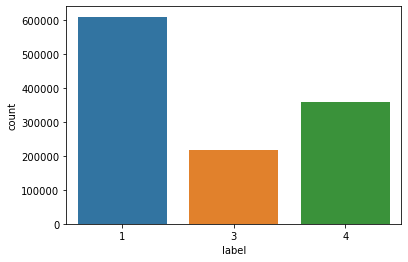

In [49]:
sns.countplot(x = 'label', data=df)

In [50]:
df = shuffle(df)
df.head(-5)

x     y     z  label
1826546  1905  2409  2027      4
1799632  1893  2378  2029      3
216903   1879  2232  1940      3
807809   2086  2371  2020      3
921423   1924  2348  1859      1
...       ...   ...   ...    ...
924702   1888  2351  1863      1
1665625  2021  2539  2032      1
1138427  2080  2540  2050      1
894027   1893  2365  1912      1
188205   1804  2343  2003      1

[1182463 rows x 4 columns]

In [51]:
#Create input output data
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

<bound method NDFrame.head of             x     y     z  label
0        1905  2409  2027      4
1        1893  2378  2029      3
2        1879  2232  1940      3
3        2086  2371  2020      3
4        1924  2348  1859      1
...       ...   ...   ...    ...
1825996  2101  2529  2075      4
1825997  1913  2551  1984      4
1825998  1886  2500  2039      4
1825999  1994  2278  2035      4
1826000  1778  2325  1972      4

[1826001 rows x 4 columns]>


<AxesSubplot:xlabel='label', ylabel='count'>

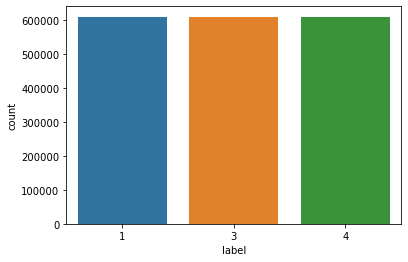

In [52]:
#Over Sample
ros= RandomOverSampler(random_state=0)
ros.fit(X,y)
X_resampled, y_resampled = ros.fit_sample(X,y)
df_resample = pd.concat([X_resampled,y_resampled], axis = 1)
print(df_resample.head)
sns.countplot(x = 'label', data=df_resample)

In [53]:
# Split into train+val (80%) and test(20%)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=69) 

# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.33, random_state=66)

In [54]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)

In [55]:
rfc_cv_score = cross_val_score(rfc, X, y, cv=5) #cv=cross validation 3fold, 5fold, 7fold etc

In [56]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[182989   6849  10768]
 [  2819 187089  11170]
 [  6438  14492 179967]]


=== Classification Report ===
              precision    recall  f1-score   support

           1       0.95      0.91      0.93    200606
           3       0.90      0.93      0.91    201078
           4       0.89      0.90      0.89    200897

    accuracy                           0.91    602581
   macro avg       0.91      0.91      0.91    602581
weighted avg       0.91      0.91      0.91    602581



=== All AUC Scores ===
[0.84118413 0.84003823 0.84040187 0.83960202 0.84074793]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.8403948348372026


Data are separated by participant
Each file contains the following information sequential number, x acceleration, y acceleration, z acceleration, label Labels are codified by numbers

1: Working at Computer

2: Standing Up, Walking and Going updown stairs

3: Standing

4: Walking

5: Going UpDown Stairs

6: Walking and Talking with Someone

7: Talking while Standing